In [1]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import tree

In [2]:
in_file_name = 'data/runs_ju.tsv'
runs = pd.read_csv(in_file_name, delimiter="\t")
runs = runs.assign(leg_id=runs.leg_nro.astype(str))
runs = runs.assign(num_runs=runs.num_runs.astype(str))
runs = runs.drop(["leg_nro", "team"], axis=1)
runs.head()

name  year  team_id team_country   pace num_runs leg_id
0  joni hirvikallio  2018        2          FIN  5.873        9      1
1  joni hirvikallio  2017       16          FIN  5.762        9      1
2  joni hirvikallio  2016      143          FIN  6.251        9      6
3  joni hirvikallio  2015       12          FIN  5.843        9      5
4  joni hirvikallio  2013       37          FIN  5.796        9      1

In [3]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105279 entries, 0 to 105278
Data columns (total 7 columns):
name            105279 non-null object
year            105279 non-null int64
team_id         105279 non-null int64
team_country    105279 non-null object
pace            105279 non-null float64
num_runs        105279 non-null object
leg_id          105279 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// # To disable auto-scrolling, execute this javascript in a notebook cell before other cells are executed:

<IPython.core.display.Javascript object>

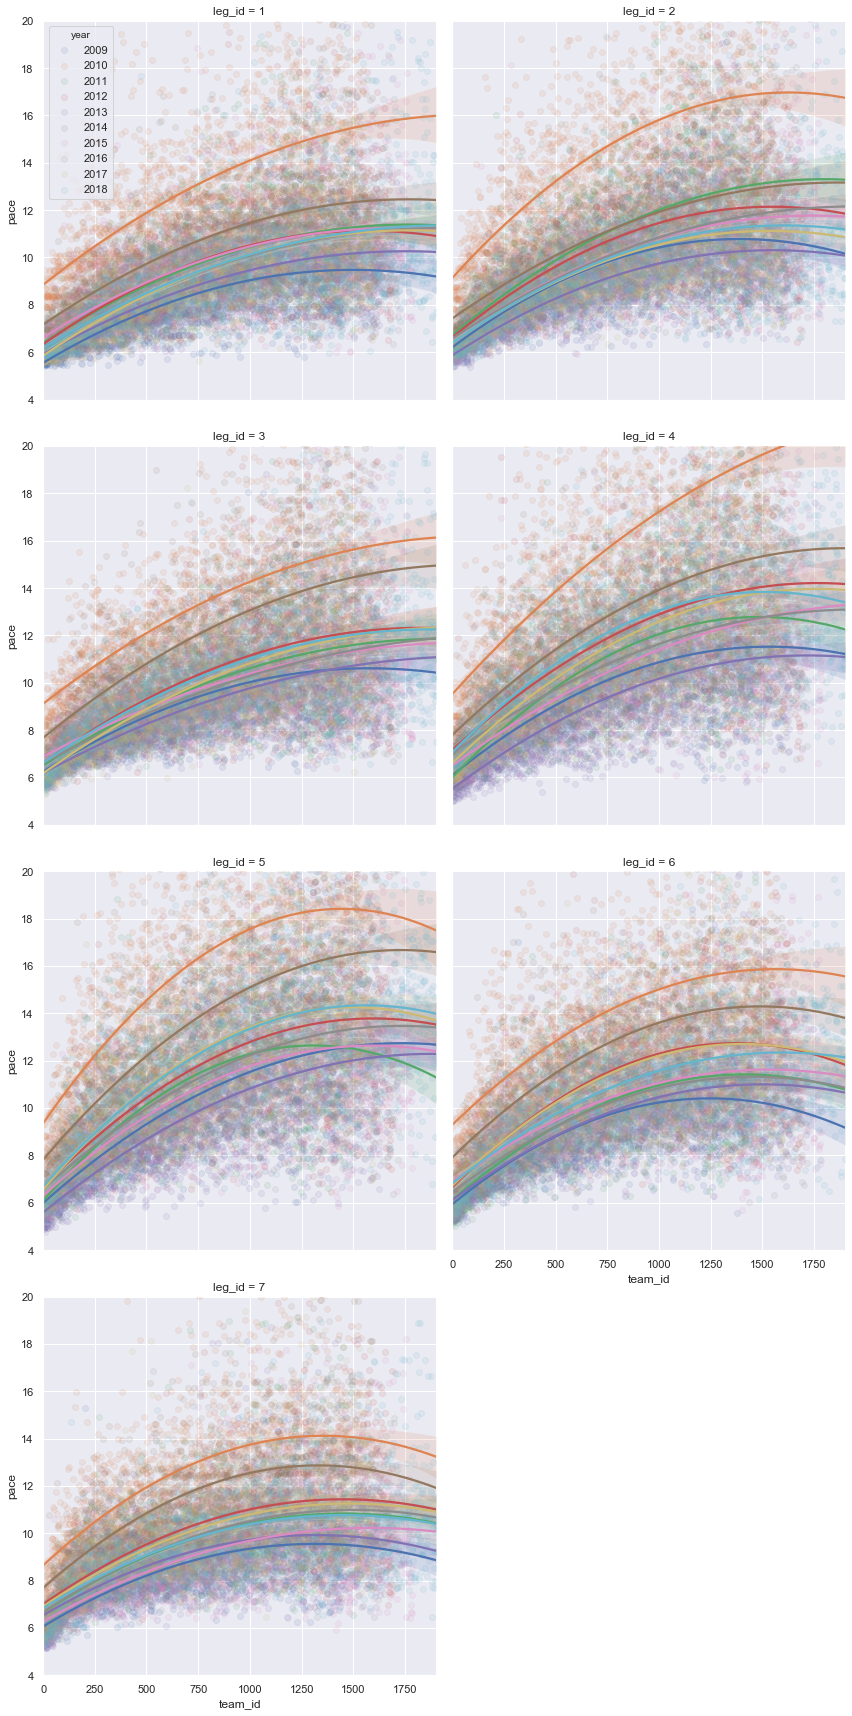

In [5]:
import seaborn as sns
sns.set(rc={})
g = sns.FacetGrid(runs, col="leg_id", hue="year", xlim=(0,runs.team_id.max()), ylim=(4,20), height=6, aspect=1, col_wrap=2, legend_out=False)
g.map(sns.regplot, "team_id", "pace", scatter_kws={'alpha':0.1}, order=2).add_legend()


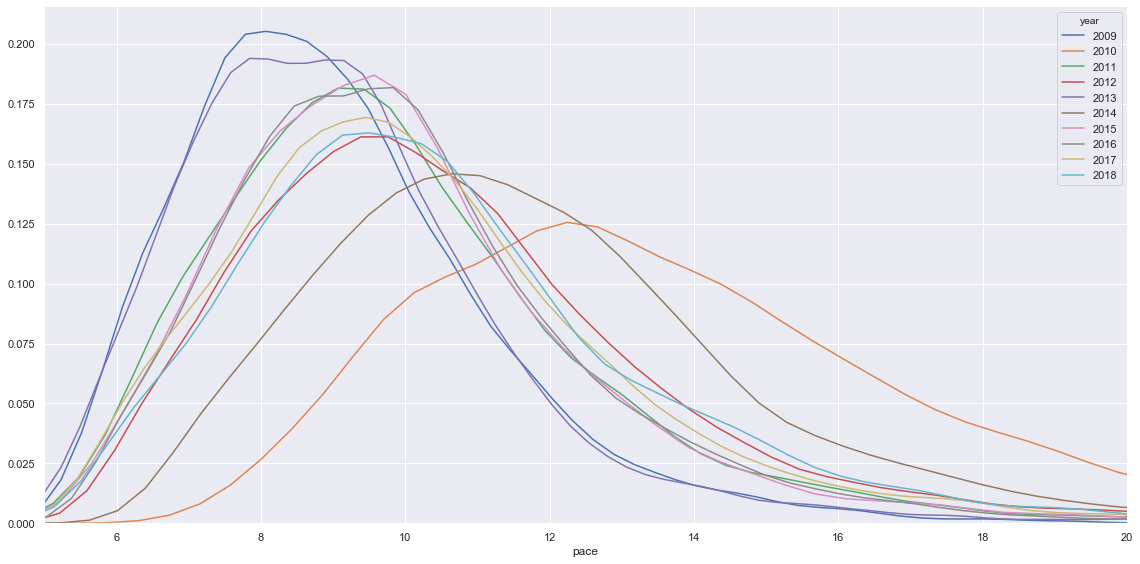

In [6]:
g = sns.FacetGrid(runs, hue="year", height=8, aspect=2, xlim=(5,20), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()


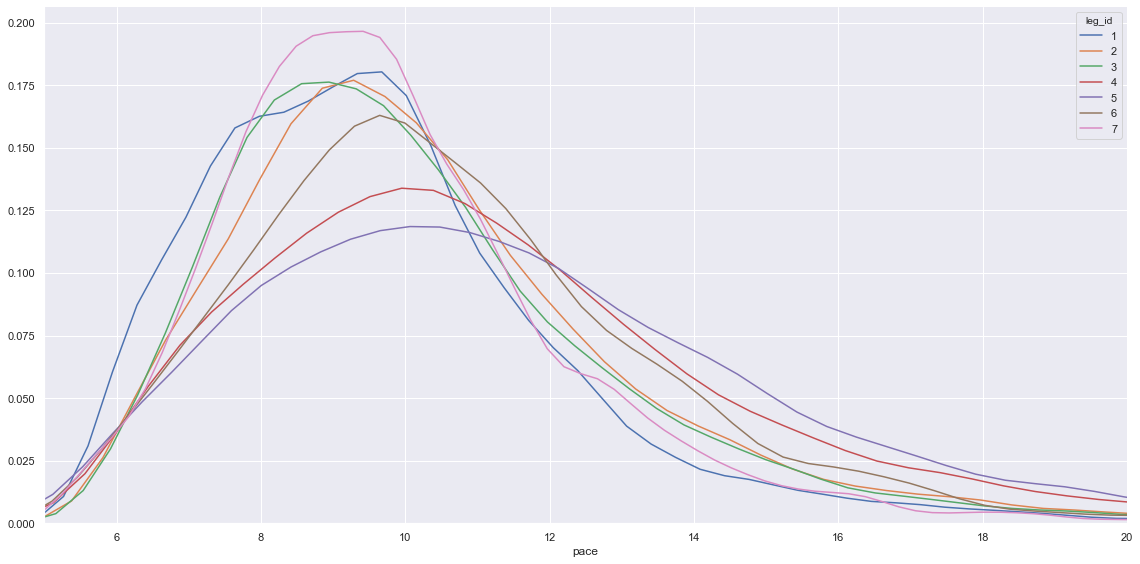

In [7]:
g = sns.FacetGrid(runs, hue="leg_id", height=8, aspect=2, xlim=(5,20), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()

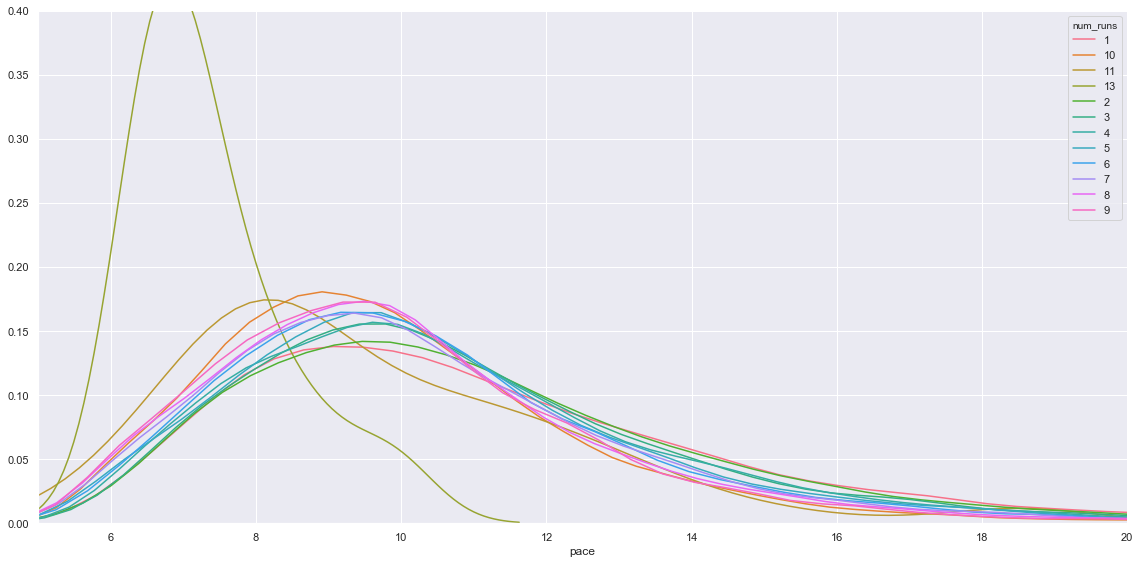

In [8]:
g = sns.FacetGrid(runs, hue="num_runs", height=8, aspect=2, xlim=(5,20), ylim=(0,0.4), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()

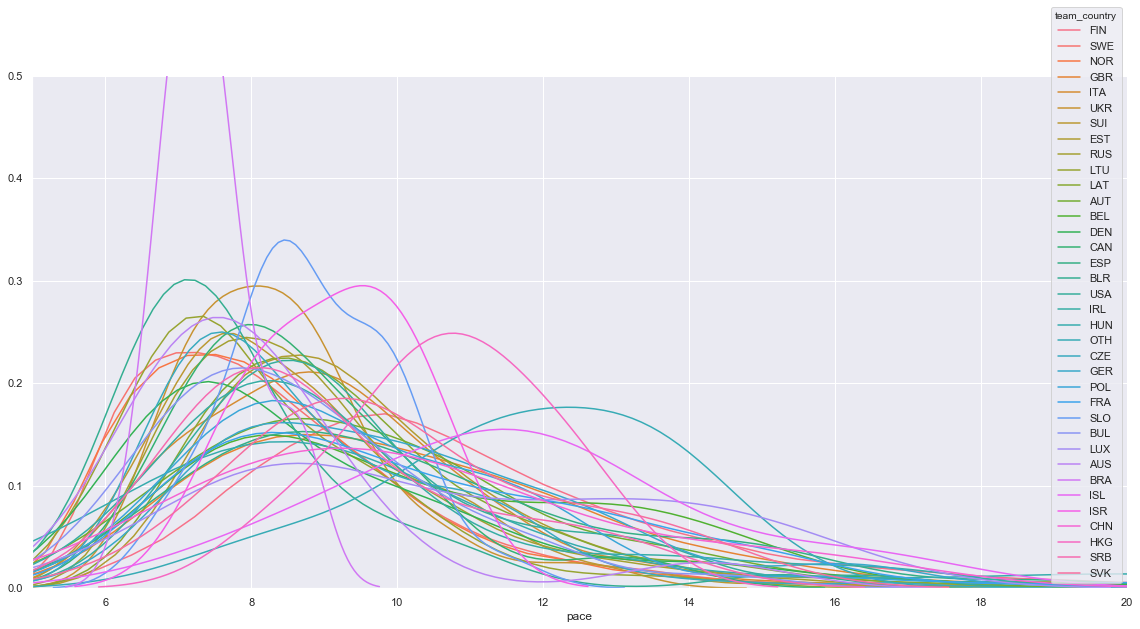

In [9]:
g = sns.FacetGrid(runs, hue="team_country", height=8, aspect=2, xlim=(5,20), ylim=(0,0.5), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()

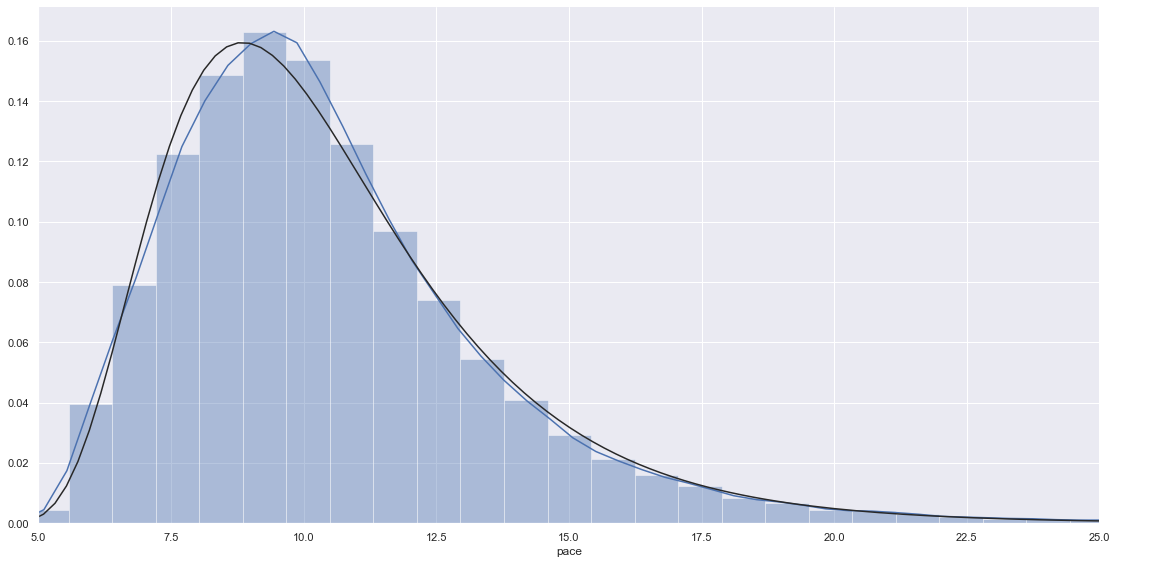

In [10]:
g = sns.FacetGrid(runs, height=8, aspect=2, xlim=(5,25), margin_titles=True) # no facet here
g.map(sns.distplot, "pace", hist=True, fit=lognorm).add_legend()

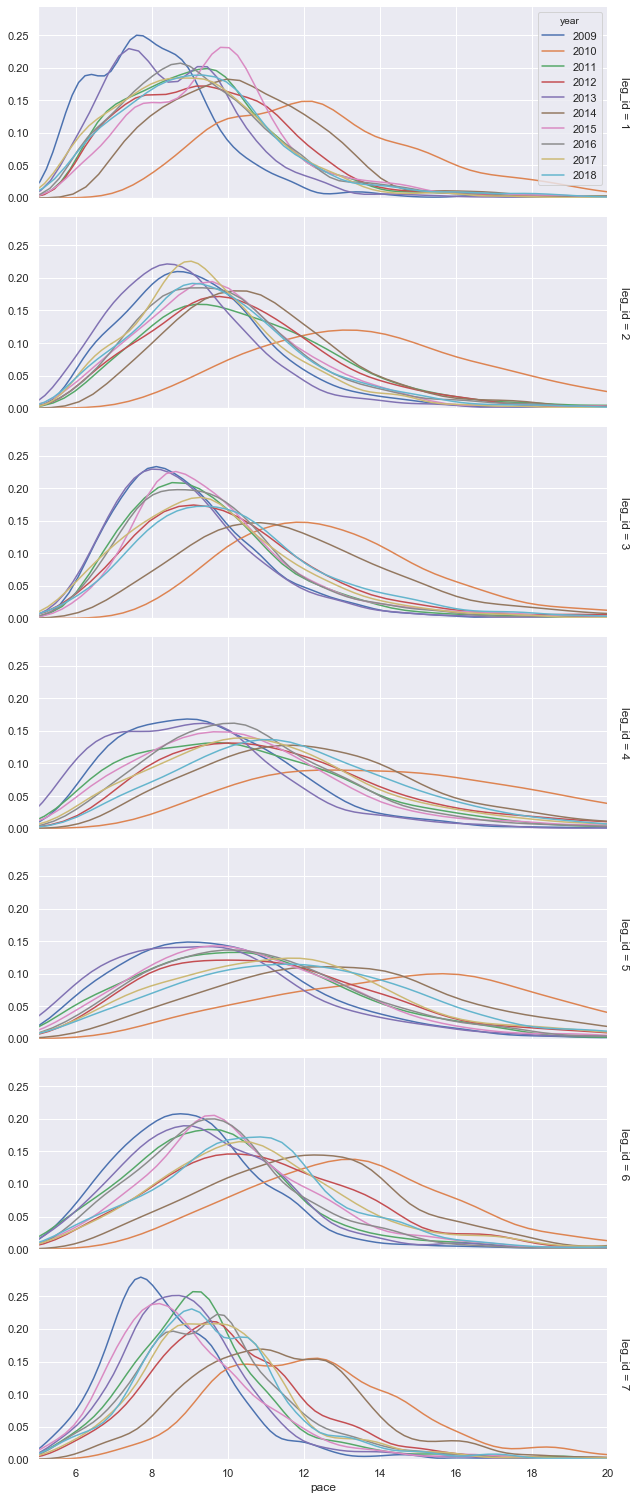

In [11]:
g = sns.FacetGrid(runs, hue="year", row="leg_id",  aspect=3, xlim=(5,20), margin_titles=True, legend_out=False)
g.map(sns.distplot, "pace", hist=False).add_legend()

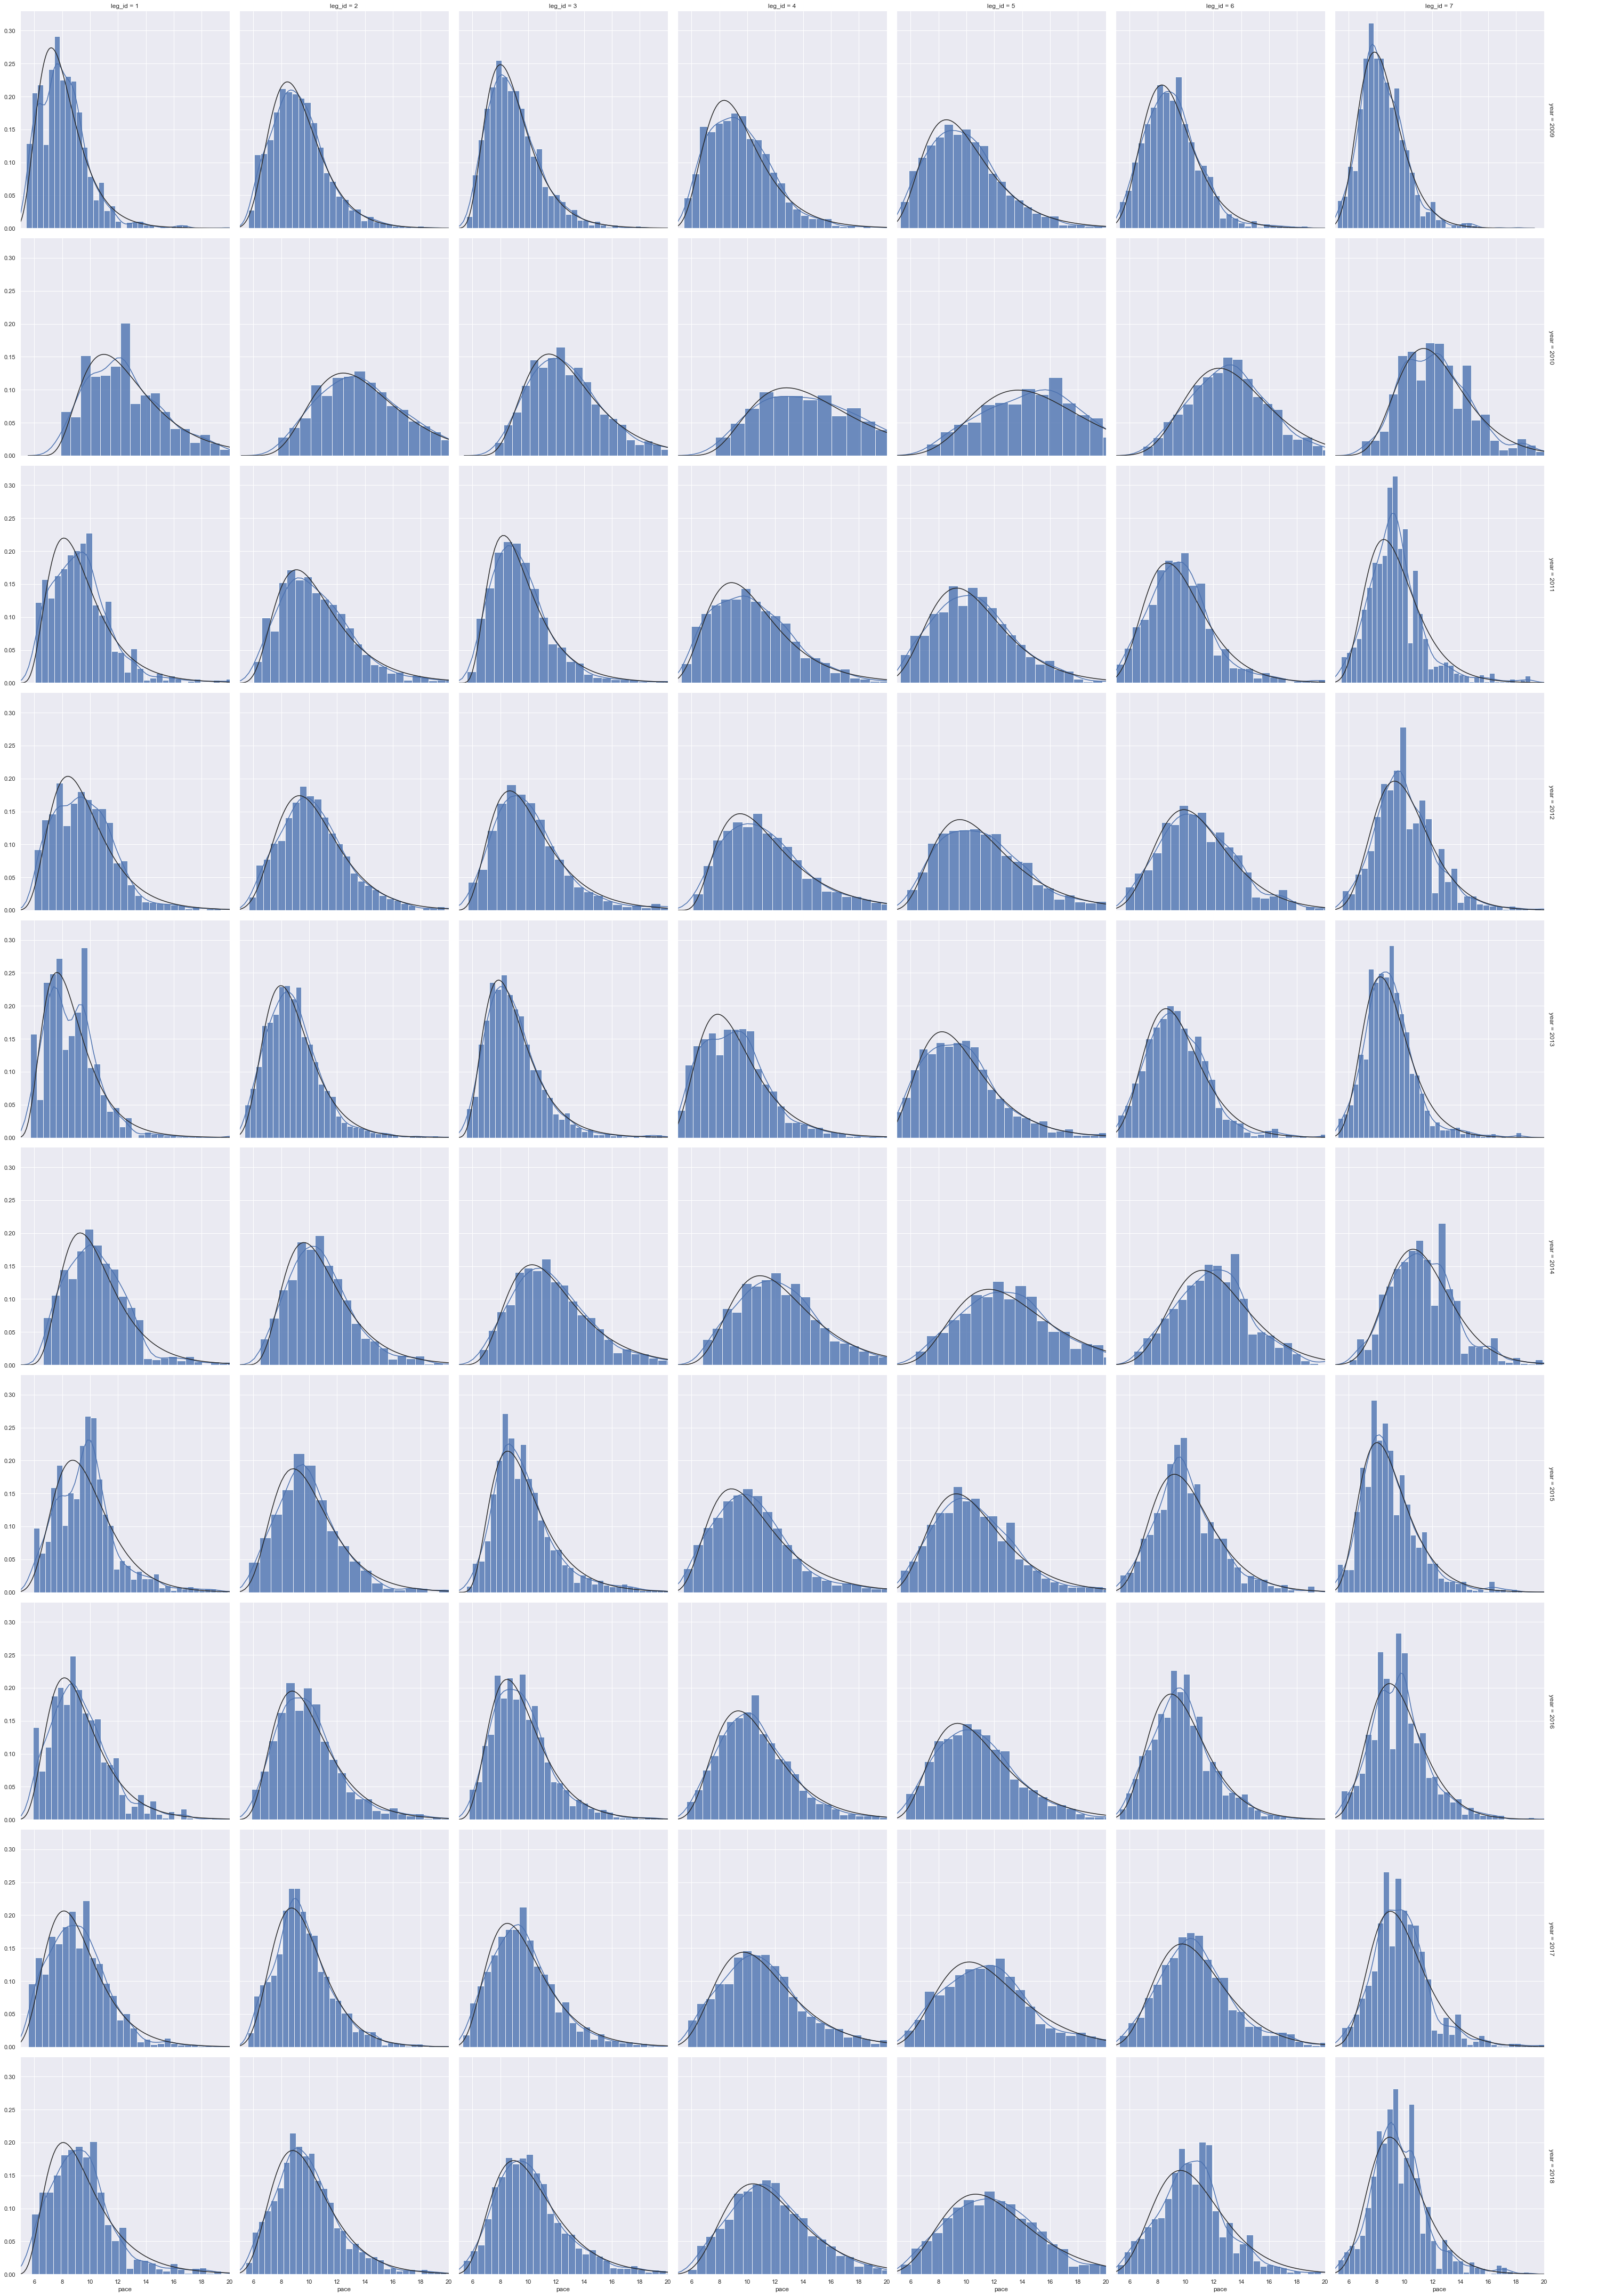

In [12]:
g = sns.FacetGrid(runs, row="year", col="leg_id", height=6, xlim=(5,20), margin_titles=True, despine=True)
g.map(sns.distplot, "pace", hist_kws={'alpha':0.8}, fit=lognorm).add_legend()

In [13]:
runs.sort_values(by="pace")

name  year  team_id team_country    pace num_runs  \
2925             tue lassen  2013        7          FIN   4.753        9   
80449           mats haldin  2013        3          NOR   4.870        8   
134          bartosz pawlak  2013        5          SWE   4.874        7   
2478            olle kärner  2013        4          FIN   4.911        8   
72831         jerker lysell  2013       23          SWE   4.926        7   
...                     ...   ...      ...          ...     ...      ...   
63051   torkil eide solstad  2015     1786          NOR  40.840        5   
86037      pasi tiirikainen  2014     1226          FIN  41.177        6   
103602          tapio teppo  2010     1229          FIN  42.181        1   
71274        sarang thombre  2010     1375          FIN  45.184        6   
56108          heimo heiska  2015     1359          FIN  45.771        9   

       leg_id  
2925        5  
80449       5  
134         5  
2478        5  
72831       5  
...       ...  
63051       4  
86037       5  
103602      5  
71274       4  
56108       2  

[105279 rows x 7 columns]

In [14]:
runs.sort_values(by="num_runs")

name  year  team_id team_country    pace num_runs leg_id
105278     råners östhagen  2009       68          NOR   5.535        1      1
78900           mauri poso  2016     1405          FIN  13.960        1      7
78899          arto arvola  2016     1405          FIN  15.278        1      5
99826   palmqvist rasmus a  2011      143          SWE   7.414        1      2
12725       allan mogensen  2018      388          SWE   6.969        1      2
...                    ...   ...      ...          ...     ...      ...    ...
45723    jussi borgenström  2015     1642          FIN  10.297        9      1
45722    jussi borgenström  2016     1437          FIN   8.769        9      1
45721    jussi borgenström  2017     1406          FIN   8.661        9      1
52137          ilpo alanko  2015     1268          FIN  14.772        9      2
52639     pertti salmenoja  2010      808          FIN  13.045        9      2

[105279 rows x 7 columns]

In [15]:
runs["first_name"] = runs.name.str.split(" ", expand=True).iloc[:,0]

counts = runs["first_name"].value_counts()
top_counts = counts[counts > 200]

runs["top_first_name"] = runs["first_name"]

def top_name(first_name): 
    if first_name in top_counts:
        return first_name
    else:
        return  "NA"
    
runs["top_first_name"] = runs.apply(lambda run: top_name(run["first_name"]), axis=1)
#g.map(sns.regplot, "team_id", "pace", scatter_kws={'alpha':0.1}, order=2).add_legend()
top_counts.describe()

count     102.000000
mean      638.833333
std       475.835921
min       201.000000
25%       288.000000
50%       490.500000
75%       826.250000
max      2415.000000
Name: first_name, dtype: float64

(4, 20)

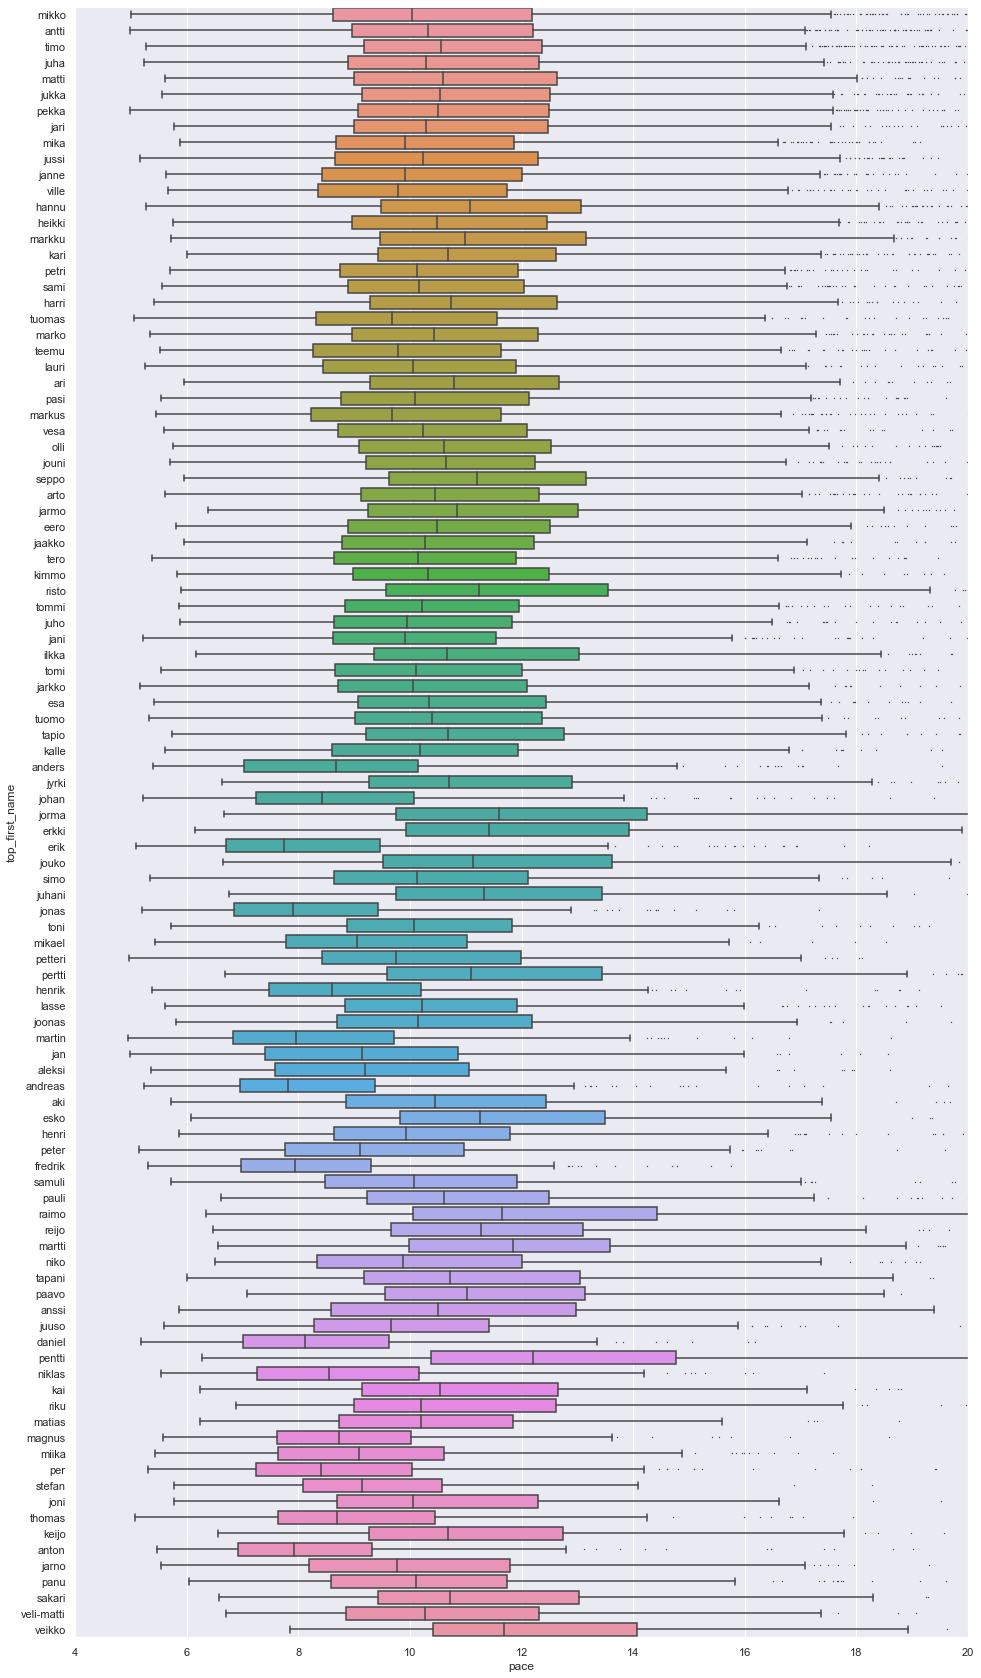

In [16]:
#g = sns.FacetGrid(runs, hue="top_first_name", height=8, aspect=2, xlim=(5,20), margin_titles=True) # no facet here
#g.map(sns.distplot, "pace", hist=False).add_legend()
plt.figure(figsize=(16, 30))
ax_names = sns.boxplot(y="top_first_name", x="pace", data=runs, fliersize=0.5, order=top_counts.index.tolist())
ax_names.set_xlim(4, 20)

In [17]:
team_country_counts = runs["team_country"].value_counts()
team_country_top_counts = team_country_counts[team_country_counts > 200]

runs["top_team_country"] = runs["team_country"]

def top_country(team_country): 
    if team_country in team_country_top_counts:
        return team_country
    else:
        return  "OTHER"
    
runs["top_team_country"] = runs.apply(lambda run: top_country(run["team_country"]), axis=1)
#g.map(sns.regplot, "team_id", "pace", scatter_kws={'alpha':0.1}, order=2).add_legend()


(4, 20)

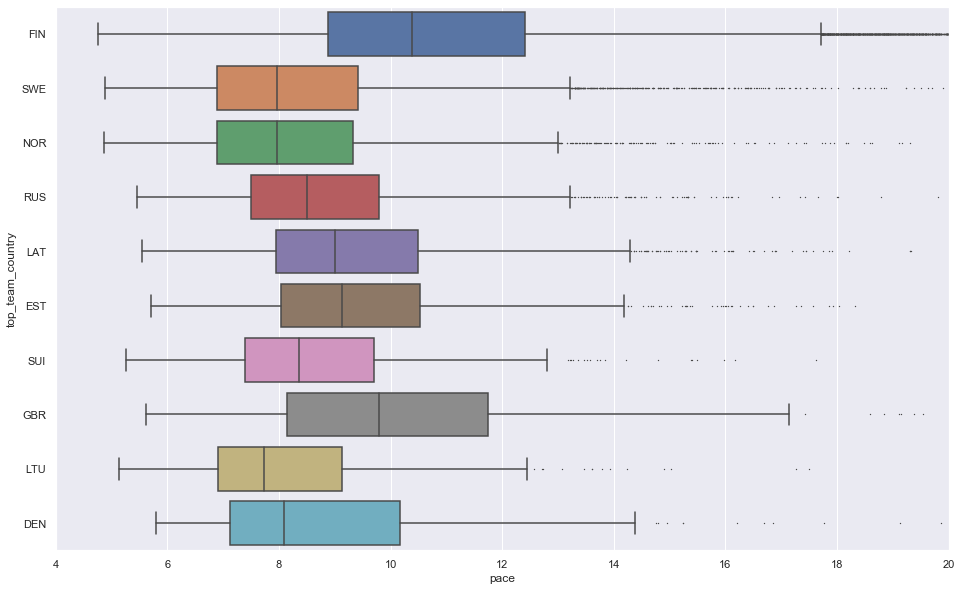

In [18]:
plt.figure(figsize=(16, 10))
ax_names = sns.boxplot(y="top_team_country", x="pace", data=runs, fliersize=0.5, order=team_country_top_counts.index.tolist())
ax_names.set_xlim(4, 20)

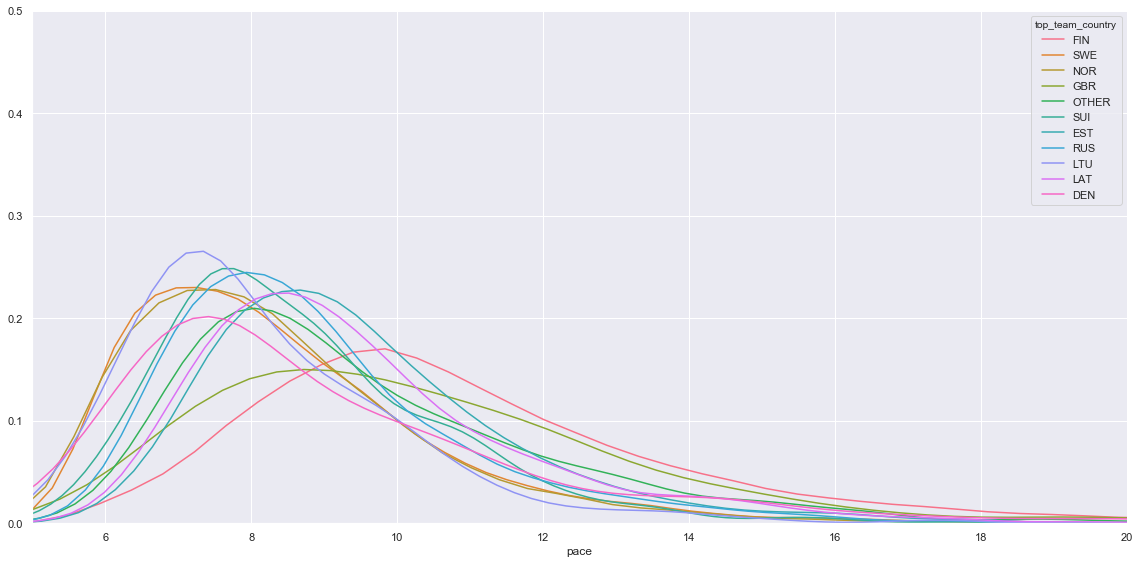

In [19]:
g = sns.FacetGrid(runs, hue="top_team_country", height=8, aspect=2, xlim=(5,20), ylim=(0,0.5), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()

In [20]:
runs
runs = runs.assign(team_id_log=np.log(runs.team_id))
runs = runs.assign(team_id_log10=np.log10(runs.team_id))
runs = runs.assign(team_id_square=np.square(runs.team_id))

first_names = pd.get_dummies(runs[["top_first_name", "leg_id", "num_runs", "top_team_country"]])
first_names[["team_id_log", "team_id_log10", "team_id_square"]] = runs[["team_id_log", "team_id_log10", "team_id_square"]]
first_names.insert(0, "team_id", runs["team_id"])

import json
with open(f"data/unknown_runners_feature_columns.json", 'w') as outfile:
    json.dump(first_names.columns.tolist(), outfile)

x = first_names.values
y = runs.pace.values

y = y.reshape(len(y), 1)

In [21]:
x.shape

(105279, 137)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2019)

In [23]:
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)

(70536, 137)

(70536, 1)

(34743, 137)

In [24]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#first_names.columns.shape
#regr.coef_[0].shape
coefs = pd.DataFrame({'feature':first_names.columns, 'coef':regr.coef_[0]})
coefs['feature'] = coefs['feature'].str.replace('top_first_name_','')
display(coefs.sort_values(by="coef").head(20))
display(coefs.sort_values(by="coef", ascending=False).head(20))

feature      coef
114           num_runs_13 -0.880354
104              leg_id_1 -0.807143
44                  juuso -0.789931
132  top_team_country_SUI -0.739161
61                  miika -0.643434
110              leg_id_7 -0.630469
3                  aleksi -0.622692
128  top_team_country_LTU -0.595836
63                 mikael -0.581447
98                 tuomas -0.523500
7                   anton -0.476683
59                 matias -0.472102
65                 niklas -0.427560
17                fredrik -0.378164
85                 samuli -0.377988
2                     aki -0.370585
26                   jani -0.363415
47                  kalle -0.361010
41                   juho -0.360137
113           num_runs_11 -0.338468

feature      coef
73                 pentti  1.134961
36                  jorma  1.097077
108              leg_id_5  1.008074
125  top_team_country_FIN  0.891818
58                 martti  0.871809
82                  risto  0.864152
14                  erkki  0.769230
75                 pertti  0.760202
79                  raimo  0.722691
107              leg_id_4  0.722044
100                veikko  0.696413
37                  jouko  0.680318
40                 juhani  0.668217
126  top_team_country_GBR  0.625766
111            num_runs_1  0.601000
115            num_runs_2  0.588267
18                  hannu  0.546209
86                  seppo  0.512168
45                  jyrki  0.453715
30                  jarmo  0.353004

In [26]:
# Make predictions using the testing set
y_pred = regr.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_pred))
y_pred

# Simple linear: Mean squared error: 6.44 Explained variance score: 0.30
# log + square = Mean squared error: 6.21 Explained variance score: 0.320
# 100 first names + leg_id = Mean squared error: 7.842 Explained variance score: 0.101
# 452 first names + leg_id + log + square = Mean squared error: 5.387 Explained variance score: 0.382

Mean squared error: 6.633
Explained variance score: 0.347


array([[13.00931141],
       [12.25364691],
       [ 9.83418447],
       ...,
       [ 9.19439048],
       [ 9.01407917],
       [10.72173297]])

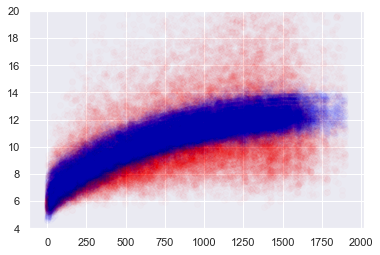

In [27]:
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x_test[:,0], y_test,  color='red', alpha=0.01)
plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
plt.ylim(4, 20)
plt.show()

In [28]:
%%time
rf = RandomForestRegressor(n_estimators=500, random_state=0, verbose=1, n_jobs=-1,
                          max_depth= 31, 
                           max_features="auto", 
                           max_leaf_nodes= 187, 
                           min_impurity_decrease= 0.00026892804687183225, 
                           min_samples_leaf= 0.0027584156528699683, 
                           min_samples_split= 21, 
                           min_weight_fraction_leaf= 0.00837)
rf.fit(x_train, y_train.ravel())
# Make predictions using the testing set
rf_y_pred = rf.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, rf_y_pred))
# Explained variance score: 1 is perfect prediction
print("Explained variance score: %.3f" % r2_score(y_test, rf_y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s


Mean squared error: 6.448
Explained variance score: 0.365
CPU times: user 11min 2s, sys: 3.21 s, total: 11min 5s
Wall time: 1min 3s


[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.2s finished


In [29]:
%%time
import sklearn
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=110,
                                                 criterion='friedman_mse', 
             learning_rate=0.10927990420965396, loss='ls', max_depth=1,
             max_features='auto', max_leaf_nodes=156,
             min_impurity_decrease=0.0, 
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, 
             random_state=0,
             subsample=0.8209381840043655, 
             verbose=1)
#gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=3100, random_state=0, verbose=1,  max_features="log2")

gbr.fit(x_train, y_train.ravel())
y_gbr_pred = gbr.predict(x_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_gbr_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_gbr_pred))

#print(f"feature_importances_: {gbr.feature_importances_}")
gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance': gbr.feature_importances_})
gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
display(gbr_features.sort_values(by="importance", ascending=False))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           9.7017           0.4386           13.12s
         2           9.5427           0.3405           12.94s
         3           9.1886           0.2807           12.75s
         4           8.9175           0.2374           12.54s
         5           8.7079           0.2059           12.37s
         6           8.4953           0.1764           12.21s
         7           8.4009           0.1495           12.13s
         8           8.1486           0.1277           12.00s
         9           8.1405           0.1096           11.86s
        10           8.0443           0.0955           11.72s
        20           7.4398           0.0349           10.61s
        30           7.1973           0.0184            9.50s
        40           7.1171           0.0128            8.28s
        50           7.0648           0.0082            7.10s
        60           6.9390           0.0049            5.91s
       

feature  importance
0                 team_id    0.337133
136        team_id_square    0.273824
134           team_id_log    0.165945
125  top_team_country_FIN    0.058337
108              leg_id_5    0.056732
..                    ...         ...
41                   juho    0.000000
40                 juhani    0.000000
39                   juha    0.000000
38                  jouni    0.000000
68                  paavo    0.000000

[137 rows x 2 columns]

CPU times: user 13.4 s, sys: 97.1 ms, total: 13.5 s
Wall time: 13.5 s


In [30]:
from time import time
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from scipy.stats import norm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")




In [31]:
import sklearn
#specify parameters and distributions to sample from
crf = sklearn.ensemble.GradientBoostingRegressor(n_estimators=3000, 
                                                 random_state=0, 
                                                 verbose=1, 
                                                 n_iter_no_change=100, tol=0.000001)

param_dist_gbr = { 
    "max_leaf_nodes": np.rint(np.abs(norm.rvs(loc=156, scale=10, size=1000))).astype("int"), 
    "max_depth": np.rint(np.abs(norm.rvs(loc=1, scale=1, size=1000))).astype("int"), 
    "max_features": ["auto", "sqrt"], 
    "learning_rate": np.abs(norm.rvs(loc=0.11, scale=0.01, size=1000)), 
    "subsample": np.abs(norm.rvs(loc=0.83, scale=0.1, size=1000)) }

n_iter_search = 5 
random_search = RandomizedSearchCV(crf, param_distributions=param_dist_gbr, random_state=2019, 
                                   n_iter=n_iter_search, cv=3, n_jobs=-1, error_score=0, verbose=1)

start = time() 
random_search.fit(x_train, y_train.ravel()) 
print("RandomizedSearchCV took %.2f seconds for %d candidates" " parameter settings." % ((time() - start), n_iter_search)) 
report(random_search.cv_results_) 
print(random_search.best_estimator_)



Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.5min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.7min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1          10.2725           0.0312            1.23m
         2          10.1639           0.0764            1.30m
         3           9.5756           0.6308            1.32m
         4           9.1881           0.3721            1.29m
         5           8.7722           0.3466            1.29m
         6           8.6661           0.1081            1.28m
         7           8.5144           0.2601            1.29m
         8           8.3128           0.1830            1.29m
         9           8.1695           0.0752            1.28m
        10           8.1946           0.0166            1.28m
        20           7.7219           0.0889            1.23m
        30           7.2253           0.0129            1.22m
        40           7.0206           0.0137            1.21m
        50           6.9716           0.0080            1.21m
        60           6.8650           0.0283            1.19m
       

In [32]:
crf_y_pred = random_search.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, crf_y_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, crf_y_pred))
r2 = r2_score(y_test, crf_y_pred)

with open(f"data/rf-best_estimator_{r2:.3f}.json", 'w') as outfile:
    outfile.write(str(random_search.best_estimator_.get_params()))

Mean squared error: 6.355
Explained variance score: 0.374


In [33]:
# plot it as in the example at http://scikit-learn.org/
#plt.scatter(x_test[:,0], y_test,  color='red', alpha=0.01)
#plt.scatter(x_test[:,0], rf_y_pred, color='blue', alpha=0.01)
#plt.ylim(4, 20)
#plt.show()

In [34]:
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
#y_rbf_pred = svr_rbf.fit(x_train, y_train.ravel()).predict(x_test)
#print("Mean squared error: %.3f"
#      % mean_squared_error(y_test, y_rbf_pred))
# Explained variance score: 1 is perfect prediction
#print('Explained variance score: %.3f' % r2_score(y_test, y_rbf_pred))


In [35]:
br = linear_model.BayesianRidge()
br.fit(x_train, y_train.ravel())
y_br_pred = br.predict(x_test)
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_br_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_br_pred))




Mean squared error: 6.633
Explained variance score: 0.347


In [36]:
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(x_train, y_train.ravel())
y_ransac_pred = ransac.predict(x_test)
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_ransac_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_ransac_pred))


Mean squared error: 9.712
Explained variance score: 0.044


In [37]:
np.log2(17)

4.087462841250339